In [1]:
library(limma)
library(Biobase)
library(dplyr)
library(ggplot2)
library(magrittr)
library(ggrepel)

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.



Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following object

Expression Set object

In [1057]:
data <- read.csv("exp/imc_df_count_normalized_all_tnbc.csv", header=TRUE, row.names=1)

#data <- read.csv("exp/imf_df_count_normalized_all_luma.csv", header=TRUE, row.names=1)


In [1058]:
### TNBC and LumA same prepocessing
data = data[,-1]
data = t(data)




In [1059]:
data

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
EGFR,0.40007354,0.55719437,0.42308615,1.4638022,0.43435487,0.49242826,0.78947661,0.25591080,0.41649488,0.5916400,...,0.75129362,0.41507232,0.50928099,0.38473679,0.36424448,0.56237394,0.34615012,5.6764907,0.36288210,0.80811604
CDH1,0.77831226,1.34841747,1.70456794,3.4613512,1.70384939,3.43103823,4.97150983,1.67335291,2.90751137,1.9534510,...,2.22457579,3.35901380,2.75645318,1.50002635,5.04634353,1.83782452,2.96820511,4.2789286,2.16823005,3.84740410
ESR1,0.07675724,0.07879468,0.08000635,0.2267838,0.09259965,0.62289768,0.35299672,0.04003607,0.05865191,0.1150807,...,0.05269557,0.11001906,0.17535190,0.10280549,0.03669304,0.13097145,0.04374503,0.2839919,0.06363220,0.18469514
ACTA2,0.24852265,0.20418347,0.17991220,0.3464829,0.18382571,0.79296147,0.57354479,0.15004582,0.31856498,0.4812772,...,0.28294059,0.19538114,0.20300256,0.15422293,0.17299730,0.34346943,0.19399916,0.2351463,0.25107747,0.30524504
H3F3B,5.17347666,12.07235461,11.66347969,17.3436766,11.83075430,12.78828186,9.67345782,3.14473182,12.31549648,16.0646996,...,10.54062587,10.71964442,3.41408645,9.46726854,5.38525628,4.64376487,5.08318482,5.1266533,9.32223842,8.51373747
MKI67,0.07676679,0.50146497,0.27356854,0.3393188,0.25031995,0.05219973,0.04623092,2.02575118,1.17488593,0.1288986,...,0.18112610,2.88999333,0.17913356,0.04741777,0.11762340,0.44412478,0.12037580,0.4563099,0.38645408,0.30504246
GATA3,3.08683718,2.33075335,2.11096631,3.8867184,0.95315688,0.40858366,3.63986250,0.81179447,0.49335181,1.2858601,...,0.97464888,0.16025936,0.82956351,2.40555983,0.03477379,2.35629915,0.80181678,0.5564841,3.22522487,0.24844607
CA9,0.06251297,0.23465632,0.13969600,0.3659460,0.16511506,0.82307960,0.63544555,0.47139300,1.77066806,1.2563915,...,0.94147079,0.82154671,7.82012656,0.89779753,0.79195865,2.04044694,0.47249663,5.2714817,0.55867536,3.71757526
VIM,9.14657853,10.85928779,6.06469321,4.4497836,9.27141796,8.63015896,10.31863930,1.81686960,8.13673352,10.2257847,...,2.71587376,7.18371949,6.04137344,0.73950646,0.19216908,14.63161727,2.60534185,1.8112838,3.62586628,1.36988662
CASP3,0.89609962,1.29582780,0.91259273,1.7618904,0.90868041,0.51871856,0.75825919,1.72178228,1.45815166,0.8671084,...,0.60721073,1.00207967,1.26469541,0.87042297,0.47411307,1.26162821,0.52904549,0.9421971,0.62921847,1.49309304


In [1060]:
#GOOD_TNBC 

data_subset_1 = as.matrix(data[,c(1, 2, 3, 4, 5, 11, 12, 14, 15, 18, 19, 21, 25, 26, 27, 28, 32)])
data_subset_2  = as.matrix(data[,c(6, 7, 8, 9, 10, 13, 16, 17, 20, 22, 23, 24, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,44)])




In [1061]:
# #BAD-LUMA --finzliex

# data_subset_1 = as.matrix(data[,c(4, 10, 17, 18, 19, 43, 52, 64, 71, 76, 83, 84, 96, 124, 149, 151, 154, 162)])
# data_subset_2  = as.matrix(data[,c(1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 152, 153, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166)])



In [1062]:
# ### clus7 matched ----- finalized

# data_subset_1 = as.matrix(data[,c(4,57,61,101,107,109,161,174)])
# data_subset_2 = as.matrix(data[,c(1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259)])

In [1063]:
# #### clus6 poora

# data_subset_1 = as.matrix(data[,c(11, 28, 43, 65, 72, 81, 97, 119, 131, 152, 169, 201, 241)])
# data_subset_2 = as.matrix(data[,c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259)])


 

In [1064]:
# ## tnbc-better surv group --finalized

# data_subset_1 = as.matrix(data[,c(8, 15, 20, 22, 31, 72, 76, 84, 85, 103, 104, 108, 129, 136, 143, 149, 160, 237)])
# data_subset_2 = as.matrix(data[,c(1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259)])

In [1065]:
data_subset_3 = cbind(data_subset_1,data_subset_2)

In [1066]:
dataset <- ExpressionSet(assayData=as.matrix(data_subset_3))


In [1067]:
yes= dim(data_subset_1)[2]
no = dim(data_subset_2)[2]
design = cbind(c(c(rep(1, yes)),c(rep(0, no))),c(c(rep(0, yes)),c(rep(1, no))))
colnames(design) <- c("match","notmatch")

In [1068]:
# design

In [1069]:
fit <- lmFit(data_subset_3, design)

In [1070]:
cont.matrix <- makeContrasts(contrasts = "match-notmatch", levels=design)

In [1071]:
fit2 <- contrasts.fit(fit, cont.matrix)

In [1072]:
fit2 <- eBayes(fit2, trend=FALSE)

In [1073]:
# fit <- eBayes(fit)

In [1074]:
results <- decideTests(fit2)

In [1075]:
topGenes =topTable(fit2)

In [1076]:
limma_result_fit <- topTable(fit2,  coef=1, n=dim(fit2)[1])

In [1077]:
limma_result_fit

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CA9,-1.665322560,1.18194712,-3.437886965,0.001317068,0.03796655,-1.067531
GATA3,1.735082639,1.89430815,3.208068469,0.002531103,0.03796655,-1.652696
PTPRC,2.099657677,2.14832789,3.016765778,0.004287508,0.04287508,-2.121407
CDH1,-1.299716767,2.69510903,-2.622300857,0.012046427,0.09034821,-3.028146
MKI67,-0.395269053,0.45563864,-1.981552855,0.053972915,0.32383749,-4.298886
PGR,0.312469972,0.67096930,1.870175501,0.068305451,0.34152725,-4.490684
CD68,0.263878652,0.69470651,1.555041667,0.127296903,0.54555816,-4.981644
H3F3B,-2.037342153,8.67002589,-1.481227352,0.145867558,0.54700334,-5.085124
MYC,-0.252567467,0.56182371,-1.321806755,0.193250879,0.60484430,-5.293071


In [1078]:
limma_result_fit$gene_symbol <- row.names(limma_result_fit)

Warning message:
"Removed 27 rows containing missing values (geom_text_repel)."


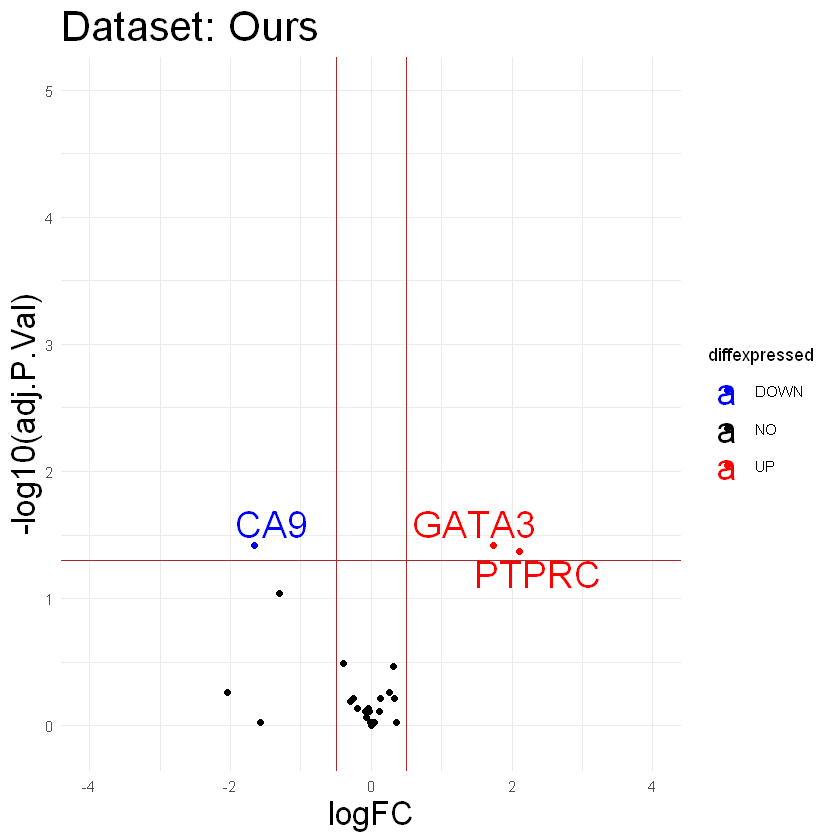

In [1079]:
limma_result_fit$diffexpressed <- "NO"
# if log2Foldchange > 0.5 and pvalue < 0.05, set as "UP" 
limma_result_fit$diffexpressed[limma_result_fit$logFC > 0.5 & limma_result_fit$adj.P.Val < 0.05] <- "UP"
# if log2Foldchange < -0.5 and pvalue < 0.05, set as "DOWN"
limma_result_fit$diffexpressed[limma_result_fit$logFC < -0.5 & limma_result_fit$adj.P.Val < 0.05] <- "DOWN"

p <- ggplot(data=limma_result_fit, aes(x=logFC, y=-log10(P.Value), label=row.names(data_subset_3),col=diffexpressed)) + geom_point(size = 2, alpha = 0.8) + theme_minimal() + geom_text_repel()
p2 <- p + geom_vline(xintercept=c(-0.6, 0.6), col="red") + geom_hline(yintercept=-log10(0.05), col="red")
p3 <- p2 + scale_color_manual(values=c("blue", "black", "red"))
mycolors <- c("blue", "red", "black")
names(mycolors) <- c("DOWN", "UP", "NO")
p3 <- p2 + scale_colour_manual(values = mycolors)

limma_result_fit$delabel <- NA
limma_result_fit$delabel[limma_result_fit$diffexpressed != "NO"] <- limma_result_fit$gene_symbol[limma_result_fit$diffexpressed != "NO"]

ggplot(data=limma_result_fit, aes(x=logFC, y=-log10(adj.P.Val), label=delabel,col=diffexpressed)) +
        geom_point() + 
        theme_minimal() +
        geom_text_repel(size=8,max.overlaps =8) +
        scale_color_manual(values=c("blue", "black", "red")) +
        geom_vline(xintercept=c(-0.5, 0.5), col="brown") +
        geom_hline(yintercept=-log10(0.05), col="brown") + xlim(-4, 4) +ylim(-0.1,5) + ggtitle("Dataset: Ours") +theme(axis.title = element_text(size = 20))  + theme(plot.title = element_text(size = 25))

In [1080]:
# p <- ggplot(data=limma_result_fit, aes(x=logFC, y=-log10(P.Value), label=row.names(data_subset_3),col=diffexpressed)) + geom_point(size = 2, alpha = 0.8) + theme_minimal() + geom_text_repel()
# p2 <- p + geom_vline(xintercept=c(-0.6, 0.6), col="red") + geom_hline(yintercept=-log10(0.05), col="red")
# p3 <- p2 + scale_color_manual(values=c("blue", "black", "red"))
# mycolors <- c("blue", "red", "black")
# names(mycolors) <- c("DOWN", "UP", "NO")
# p3 <- p2 + scale_colour_manual(values = mycolors)

In [1056]:
# ggplot(data=limma_result_fit, aes(x=logFC, y=-log10(P.Value), label=row.names(limma_result_fit),col=diffexpressed)) +
#         geom_point() + 
#         theme_minimal() +
#         geom_text_repel(size=8) +
#         scale_color_manual(values=c("black", "red", "blue")) +
#         geom_vline(xintercept=c(-0.5, 0.5), col="brown") +
#         geom_hline(yintercept=-log10(0.05), col="brown") + xlim(-2, 2) +ylim(-0.1,30) + ggtitle("Dataset: Ours") +theme(axis.title = element_text(size = 20))  + theme(plot.title = element_text(size = 25))